In [1]:
import os
import shutil
from PIL import Image
import imagehash
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Function to find and remove duplicate images
def remove_duplicates(directory):
    image_hashes = {}
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img_hash = imagehash.average_hash(img)
                    if img_hash in image_hashes:
#                         print(f"Duplicate found: {file_path}, removing...")
                        os.remove(file_path)
                    else:
                        image_hashes[img_hash] = file_path
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Function to copy dataset to a writable directory
def copy_dataset(src_dir, dest_dir):
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir)
    shutil.copytree(src_dir, dest_dir)

# Set original dataset directory paths
original_train_dir = '/kaggle/input/trainsplit/train'
original_validation_dir = '/kaggle/input/trainsplit/validation'
original_test_dir = '/kaggle/input/trainsplit/test'

# Set writable dataset directory paths
train_dir = '/kaggle/working/train'
validation_dir = '/kaggle/working/validation'
test_dir = '/kaggle/working/test'

# Copy dataset to writable directories
# print("Copying dataset to writable directories...")
copy_dataset(original_train_dir, train_dir)
copy_dataset(original_validation_dir, validation_dir)
copy_dataset(original_test_dir, test_dir)

# Remove duplicate images from the training, validation, and test sets
# print("Removing duplicates from training set...")
remove_duplicates(train_dir)
# print("Removing duplicates from validation set...")
remove_duplicates(validation_dir)
# print("Removing duplicates from test set...")
remove_duplicates(test_dir)

# ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)



# ImageDataGenerator for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', classes=['output0', 'output1', 'output2'])
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', classes=['output0', 'output1', 'output2'])
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', classes=['output0', 'output1', 'output2'], shuffle=False)




2024-06-14 16:20:04.903277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 16:20:04.903526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 16:20:05.084457: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 10625 images belonging to 3 classes.
Found 6226 images belonging to 3 classes.
Found 3960 images belonging to 3 classes.


In [2]:
from tensorflow.keras.models import load_model

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=8, validation_data=validation_generator)

# Save the model


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


333/333 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.5575 - loss: 0.9497 - val_accuracy: 0.8102 - val_loss: 0.5049
Epoch 2/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.8261 - loss: 0.4325 - val_accuracy: 0.9200 - val_loss: 0.2062
Epoch 3/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.8931 - loss: 0.2738 - val_accuracy: 0.9364 - val_loss: 0.1756
Epoch 4/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9304 - loss: 0.1909 - val_accuracy: 0.9716 - val_loss: 0.0952
Epoch 5/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.9580 - loss: 0.1224 - val_accuracy: 0.9788 - val_loss: 0.0643
Epoch 6/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 420s 1s/step - accuracy: 0.9680 - loss: 0.0922 - val_accuracy: 0.9855 - val_loss: 0.0424
Epoch 7/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.9792 - loss: 0.0672 - val_accuracy: 0.9881 - val_loss: 0.0377
Epoch 8/8
333/333 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - accuracy: 0.9799 - loss: 0.0605 - val_accuracy: 0.9881 - val

In [12]:
model.save('/kaggle/working/denoise_model.h5')


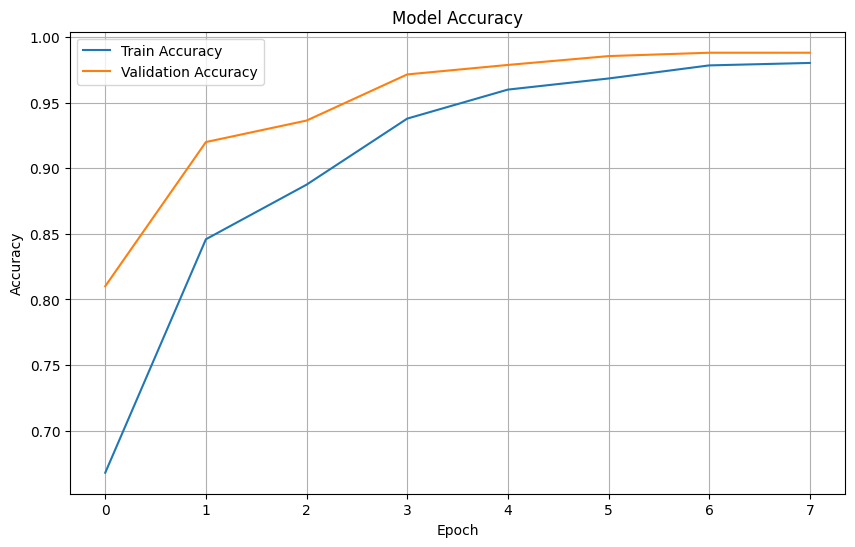

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Map class indices to class labels
class_labels = ['Normal', 'Diabetes', 'Non-Diabetes']

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


124/124 ━━━━━━━━━━━━━━━━━━━━ 33s 269ms/step - accuracy: 0.9956 - loss: 0.0143
Test accuracy: 0.9881312847137451
124/124 ━━━━━━━━━━━━━━━━━━━━ 34s 270ms/step
              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99      1825
    Diabetes       0.97      0.99      0.98      1137
Non-Diabetes       1.00      0.97      0.98       998

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true and y_pred are defined from your previous code
# y_true = test_generator.classes
# predictions = model.predict(test_generator)
# y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate Specificity for each class
num_classes = cm.shape[0]
specificities = []

for i in range(num_classes):
    TN = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))  # True Negatives
    FP = np.sum(cm[:, i]) - cm[i, i]  # False Positives
    specificity = TN / (TN + FP)
    specificities.append(specificity)

# Calculate average specificity
avg_specificity = np.mean(specificities)

# Print Specificities for each class using renamed labels
class_labels = ['Normal', 'Diabetes', 'Non-Diabetes']
for i, label in enumerate(class_labels):
    print(f'Specificity for class {label}: {specificities[i]}')

# Print average specificity
print(f'Average Specificity: {avg_specificity}')


Specificity for class Normal: 0.9939110070257611
Specificity for class Diabetes: 0.9890187743535246
Specificity for class Non-Diabetes: 0.9989871708305199
Average Specificity: 0.9939723174032685


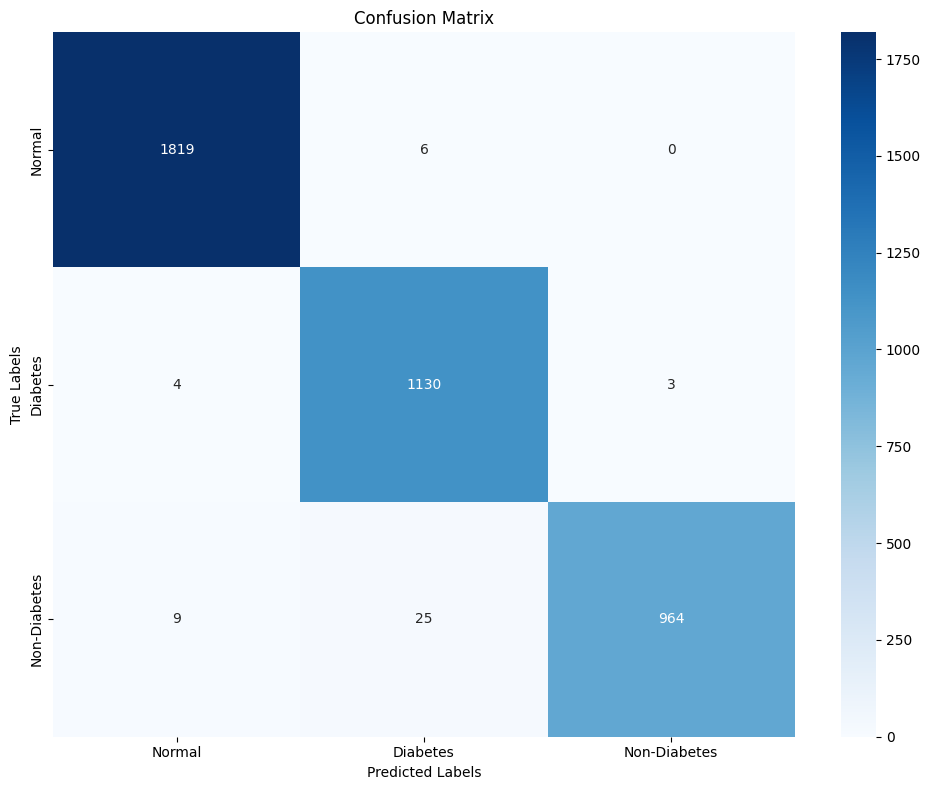

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

class_labels = ['Normal', 'Diabetes', 'Non-Diabetes']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.tight_layout()
plt.show()


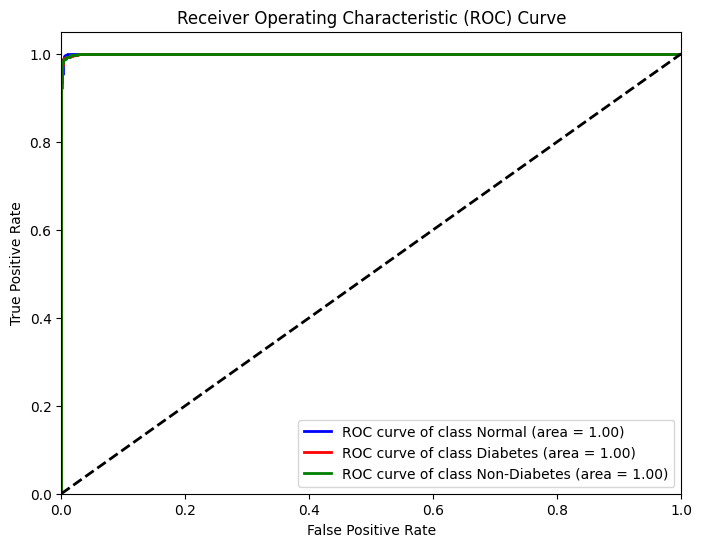

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already defined:
# y_true_bin: Binarized true labels
# predictions: Predicted probabilities

# Initialize dictionaries to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i, color in zip(range(len(class_labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# import os
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# import numpy as np
# from PIL import Image, ImageDraw, ImageFont
# import shutil

# # Load the saved model
# model = load_model('/kaggle/working/denoise_model.h5')

# # Define the directory of your test dataset
# test_data_dir = '/kaggle/input/testcontrast/ProcessedImages/output1'

# # Define class labels
# class_labels = ['Normal', 'Diabetes', 'Non-Diabetes']

# # Font settings for drawing text on image
# font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Adjust as needed
# font_size = 24
# font = ImageFont.truetype(font_path, font_size)
# text_color = (255, 255, 255)  # White text color

# # Iterate through the test data directory
# for root, dirs, files in os.walk(test_data_dir):
#     for file in files:
#         if file.endswith('.tif'):  # Assuming images are in TIFF format
#             file_path = os.path.join(root, file)
            
#             # Load and preprocess the image
#             img = Image.open(file_path)
#             img = img.resize((150, 150))  # Resize if needed
#             img_array = np.array(img) / 255.0  # Normalize to [0, 1]
#             img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            
#             # Predict the class probabilities
#             predictions = model.predict(img_array)
#             predicted_class = np.argmax(predictions)
#             predicted_label = class_labels[predicted_class]
            
#             # Draw label on image
#             draw = ImageDraw.Draw(img)
#             draw.text((10, 10), predicted_label, font=font, fill=text_color)
            
#             # Create destination directory if it doesn't exist
#             dest_dir = os.path.join('/path/to/save/predictions', predicted_label)
#             if not os.path.exists(dest_dir):
#                 os.makedirs(dest_dir)
            
#             # Save image with label
#             filename, file_extension = os.path.splitext(file)
#             new_filename = f'{filename}_{predicted_label}{file_extension}'
#             new_file_path = os.path.join(dest_dir, new_filename)
#             img.save(new_file_path)
